In [1]:
import pandas as pd   #importing necessary libraries
import numpy as np

In [2]:
dataframe = pd.read_csv('D:\Summer 2022\Datascience Projects UDEMY\Project3/BAJFINANCE.csv') #reading our CSV files 
dataframe.head() #The VWAP is what is dependent on factors such as High, Low, Volume, Turnover, Trades

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [3]:
dataframe.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

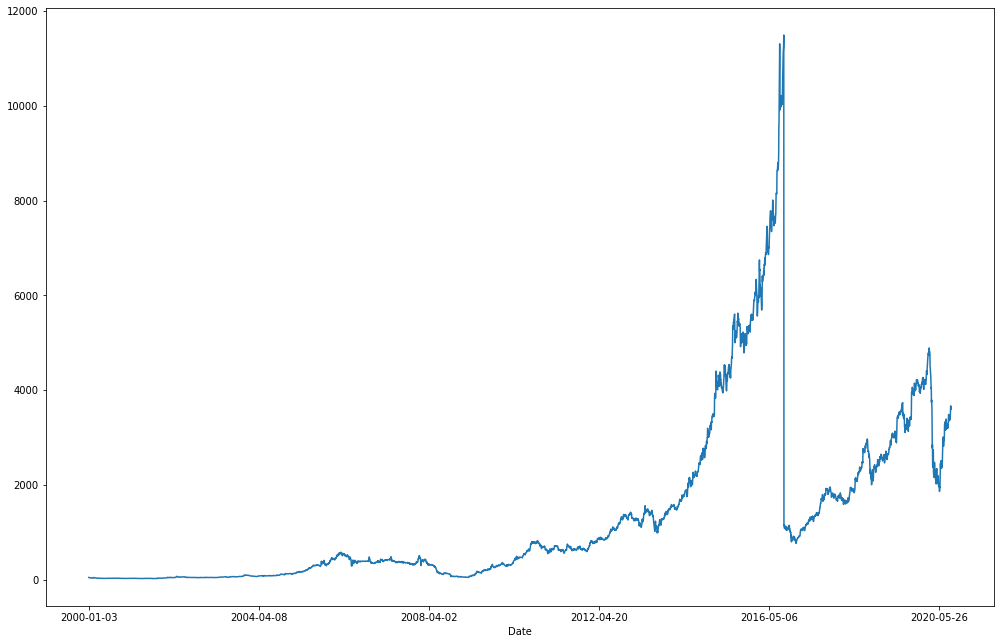

In [4]:
dataframe['VWAP'].plot(figsize=(17,11)) 

In [5]:
dataframe.shape  #the no.of rows and columns

(5070, 14)

In [6]:
dataframe.isna().sum() #checking for the null values in the dataframe

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
dataframe.dropna(inplace=True) #deleting rows containing null values
dataframe.isna().sum() #now re checking will give no null rows

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [8]:
dataframe.shape #our no.of rows got reduced

(2291, 14)

In [9]:
df = dataframe.copy() #copying the dataframe into another one

In [10]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [11]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [12]:
lagfeatures = ['High','Low','Volume','Turnover','Trades'] #These are the independent features I have taken 
window1=3
window2=7

In [13]:
for feature in lagfeatures:  # For loops for calucating the moving averages by using rolling concept
    df[feature+'rolling_mean_3']=df[feature].rolling(window=window1).mean() 
    df[feature+'rolling_mean_7']=df[feature].rolling(window=window2).mean()
    

In [14]:
for feature in lagfeatures:
    df[feature+'rolling_std_3']=df[feature].rolling(window=window1).std()
    df[feature+'rolling_std_7']=df[feature].rolling(window=window2).std()
    

In [15]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [16]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [17]:
df.shape 

(2291, 34)

In [18]:
df.isna().sum() #re checking for null values in this df dataframe

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [19]:
df.dropna(inplace=True) #Dropping those


In [20]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [21]:
indfeatures = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']  #Taken important parameters necessary in predicting the model

In [22]:
trainingdata = df[0:1900] # Choosen more data points for training to get a high accuracy
testdata = df[1900:]
trainingdata #checking for the values

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,1.349705e+04,1.837389e+04,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2.434971e+03,1.804733e+04,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,1.564005e+04,1.783564e+04,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,1.508818e+04,1.313947e+04,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,4.575813e+03,1.246914e+04,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,BAJFINANCE,EQ,2595.50,2608.00,2608.00,2526.00,2581.10,2574.85,2567.54,2083418,...,27.555580,32.709093,95.413001,107.316761,2.021753e+06,1.957781e+06,4.889767e+14,4.837465e+14,65526.572595,78279.359316
2019-02-01,BAJFINANCE,EQ,2574.85,2575.00,2687.90,2575.00,2629.00,2628.40,2630.85,2117768,...,42.332297,39.528133,24.637370,102.652820,1.027316e+06,1.862602e+06,2.656886e+14,4.596597e+14,47723.681208,73003.630551
2019-02-04,BAJFINANCE,EQ,2628.40,2610.00,2623.55,2572.20,2594.30,2594.45,2593.98,942113,...,42.361018,38.236085,27.517510,98.503470,6.690692e+05,1.832537e+06,1.745154e+14,4.521321e+14,32453.453165,71342.100696


In [23]:
!pip install pmdarima #installed for ARIMA model


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Invalid requirement: '#installed'


In [24]:
from pmdarima import auto_arima 

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
model = auto_arima(y=trainingdata['VWAP'],exogenous=trainingdata[indfeatures],trace=True) #Preparing the model for our VWAP as dependent and indfeatures are independent features
model.fit(trainingdata['VWAP'],trainingdata[indfeatures])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=22031.535, Time=2.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22025.998, Time=1.49 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22027.574, Time=1.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=22027.562, Time=1.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=34470.095, Time=1.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22030.015, Time=1.95 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 10.433 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [27]:
forecast = model.predict(n_periods=len(testdata),exogenous=testdata[indfeatures]) #prediction for the test data
testdata['FORECAST ARIMA'] = forecast #Preparing another column for FORECAST ARIMA. which is the prediction

<AxesSubplot:xlabel='Date'>

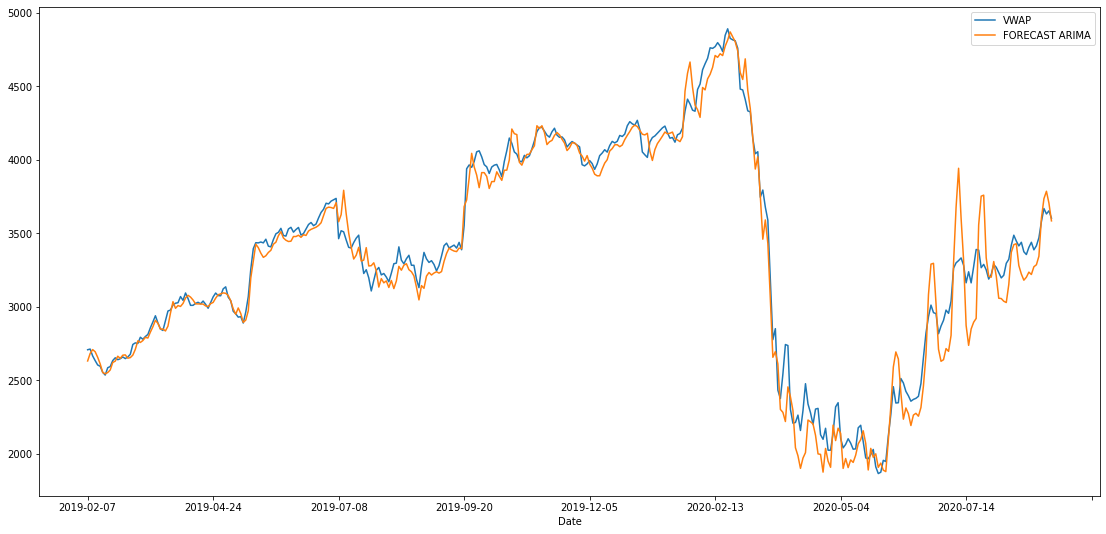

In [28]:
testdata[['VWAP','FORECAST ARIMA']].plot(figsize=(19,9)) #PLOTTED

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
np.sqrt(mean_squared_error(testdata['VWAP'],testdata['FORECAST ARIMA'])) #Checking RMS error


133.00076488738927

In [31]:
mean_absolute_error(testdata['VWAP'],testdata['FORECAST ARIMA']) #Checking absolute error

92.16429567688554